In [1]:
# Load data and check for missing data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("freMTPL2freq.csv", sep=';')
df.columns = df.columns.str.strip()  # Clean column names

# Convert relevant columns to numeric
numeric_cols = ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density', 'Exposure', 'ClaimNb']

for col in numeric_cols:
    # Replace commas with dots and convert to float
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for missing values, NaNs and infinite values
missing_values = df.isnull().sum()
infinite_values = df.isin([np.inf, -np.inf]).sum()
print("Missing values in each column:")
print(missing_values)
print("Infinite values in each column:")
print(infinite_values)

Missing values in each column:
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
Exposure      0
ClaimNb       0
dtype: int64
Infinite values in each column:
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
Exposure      0
ClaimNb       0
dtype: int64


In [2]:
# Print statistics
print(df.describe(include='all'))

             VehPower         VehAge        DrivAge     BonusMalus VehBrand  \
count   678007.000000  678007.000000  678007.000000  678007.000000   678007   
unique            NaN            NaN            NaN            NaN       11   
top               NaN            NaN            NaN            NaN      B12   
freq              NaN            NaN            NaN            NaN   166024   
mean         6.454653       7.044218      45.499061      59.761588      NaN   
std          2.050902       5.666235      14.137492      15.636700      NaN   
min          4.000000       0.000000      18.000000      50.000000      NaN   
25%          5.000000       2.000000      34.000000      50.000000      NaN   
50%          6.000000       6.000000      44.000000      50.000000      NaN   
75%          7.000000      11.000000      55.000000      64.000000      NaN   
max         15.000000     100.000000     100.000000     230.000000      NaN   

         VehGas        Density  Region       Exposu

In [3]:
# Clean data
# Remove rows with Exposure = 0 (ClaimFreq undefined)
df = df[df['Exposure'] > 0]

# Drop rows with missing values in any essential column
essential_cols = numeric_cols + ['VehBrand', 'VehGas', 'Region']
df.dropna(subset=essential_cols, inplace=True)

# Compute claim frequency (safe now because Exposure > 0)
df['ClaimFreq'] = df['ClaimNb'] / df['Exposure']

In [4]:
# Print statistics
print(df.describe(include='all'))

             VehPower         VehAge        DrivAge     BonusMalus VehBrand  \
count   678007.000000  678007.000000  678007.000000  678007.000000   678007   
unique            NaN            NaN            NaN            NaN       11   
top               NaN            NaN            NaN            NaN      B12   
freq              NaN            NaN            NaN            NaN   166024   
mean         6.454653       7.044218      45.499061      59.761588      NaN   
std          2.050902       5.666235      14.137492      15.636700      NaN   
min          4.000000       0.000000      18.000000      50.000000      NaN   
25%          5.000000       2.000000      34.000000      50.000000      NaN   
50%          6.000000       6.000000      44.000000      50.000000      NaN   
75%          7.000000      11.000000      55.000000      64.000000      NaN   
max         15.000000     100.000000     100.000000     230.000000      NaN   

         VehGas        Density  Region       Exposu

In [5]:
print(df)

        VehPower  VehAge  DrivAge  BonusMalus VehBrand   VehGas  Density  \
0              4       9       23         100       B6  Regular     7887   
1              4       6       26         100       B6  Regular     2308   
2              4       6       26         100       B6  Regular     2308   
3              7       4       44          50       B6  Regular       37   
4              5       2       29          90       B6  Regular      335   
...          ...     ...      ...         ...      ...      ...      ...   
678002         6      10       27         118       B1   Diesel     1978   
678003         4       9       34          76       B1  Regular     6681   
678004         4      15       37          50       B1  Regular     1767   
678005         4      15       69          50       B1  Regular     1541   
678006         7       5       18         100       B1  Regular      804   

       Region  Exposure  ClaimNb  ClaimFreq  
0         R31  0.760000        0        0

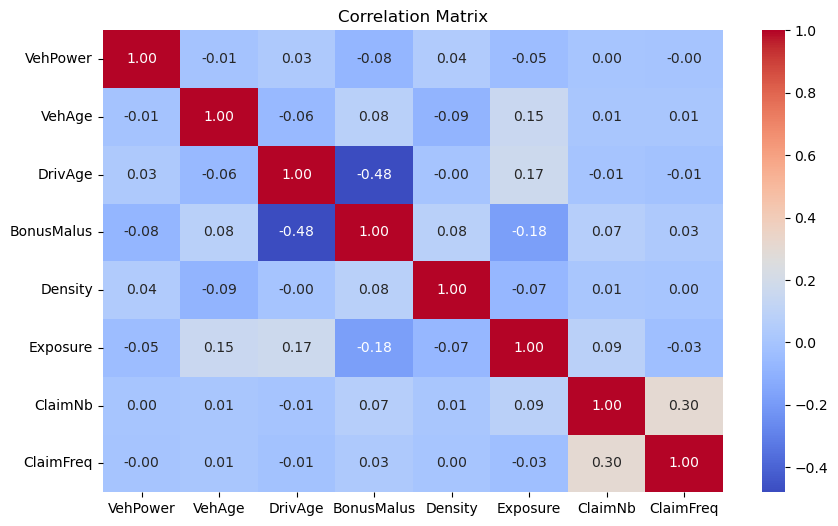

In [6]:
# Correlation heatmap

# Numerical features distribution
numeric_features = ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density', 'Exposure', 'ClaimNb']

plt.figure(figsize=(10, 6))
corr = df[numeric_features + ['ClaimFreq']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

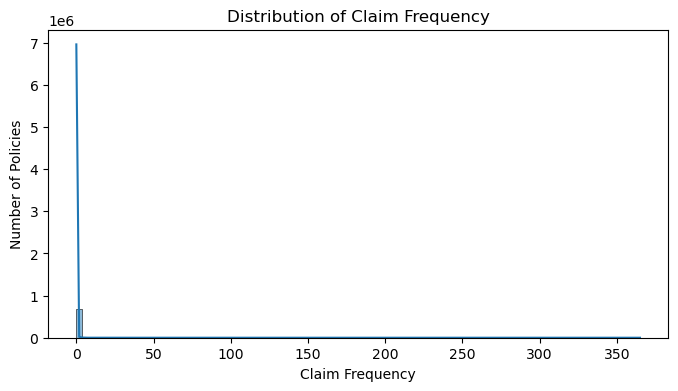

In [7]:
# Distribution of claim frequency

df['ClaimFreq'] = df['ClaimNb'] / df['Exposure']

plt.figure(figsize=(8, 4))
sns.histplot(df['ClaimFreq'], bins=100, kde=True)
plt.title('Distribution of Claim Frequency')
plt.xlabel('Claim Frequency')
plt.ylabel('Number of Policies')
#plt.xlim(0, 3)
plt.show()

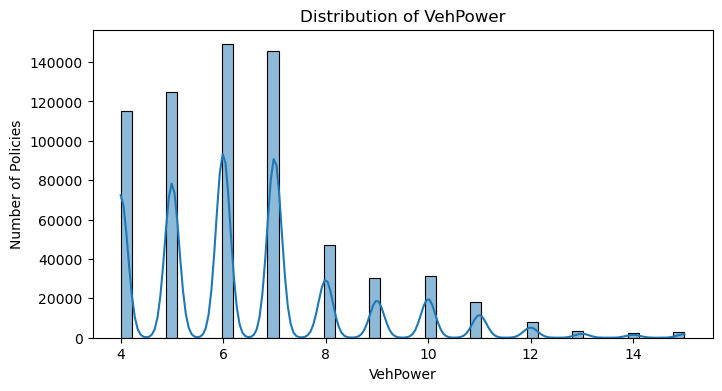

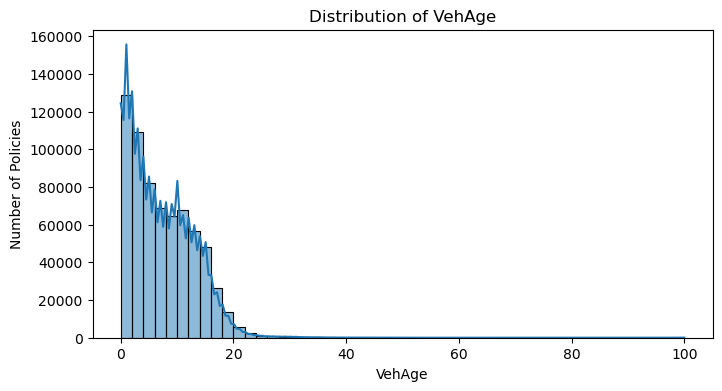

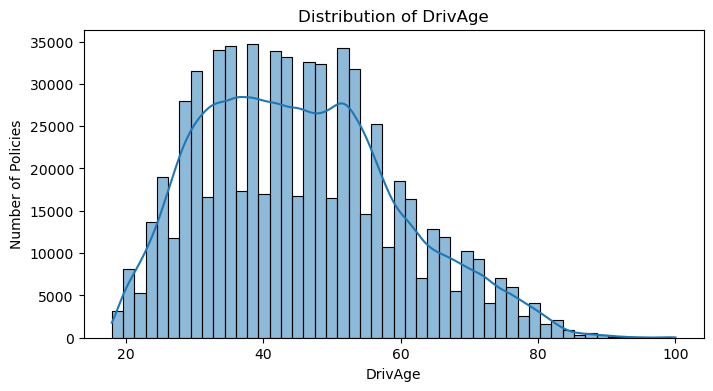

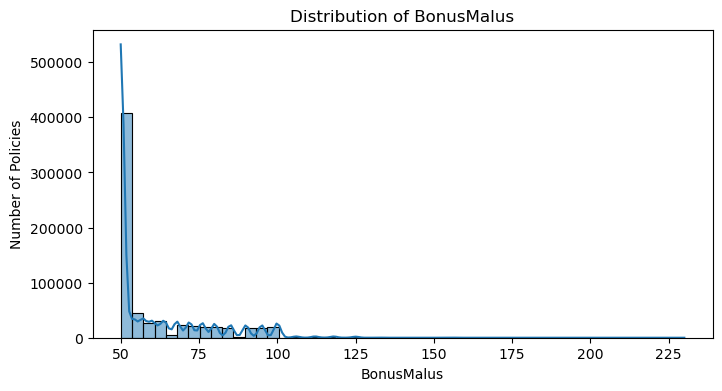

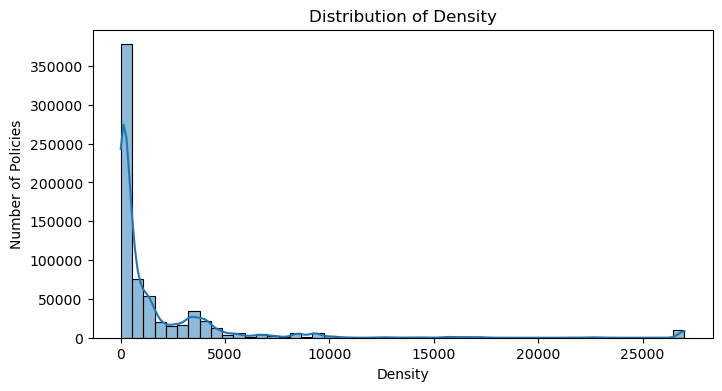

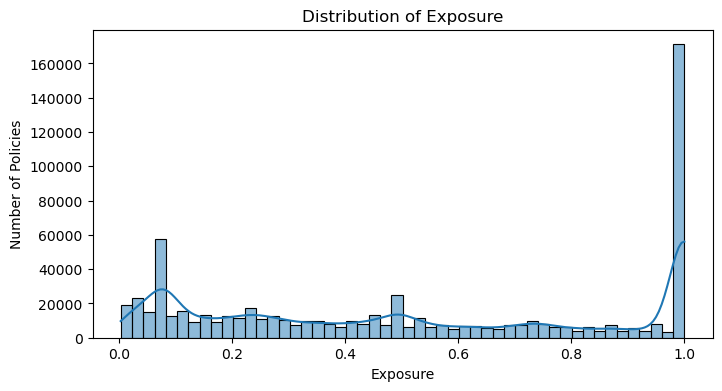

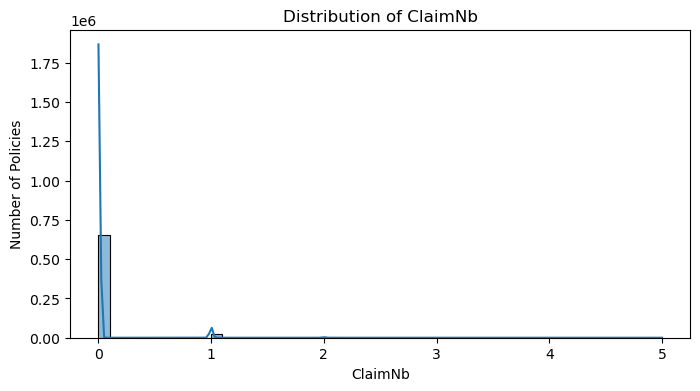

In [8]:
# Numerical features distribution
numeric_features = ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density', 'Exposure', 'ClaimNb']

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Number of Policies')
    plt.show()

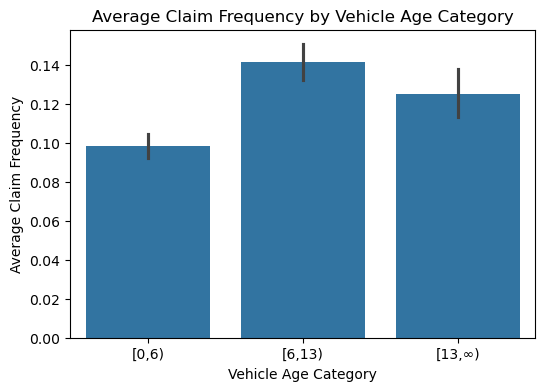

In [9]:
# Compute VehAge category
df['VehAge_cat'] = pd.cut(
    df['VehAge'],
    bins=[-1, 5, 12, np.inf],
    labels=['[0,6)', '[6,13)', '[13,∞)']
)

# Average claim frequency by vehicle age category
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='VehAge_cat', y='ClaimFreq', estimator=np.mean)
plt.title('Average Claim Frequency by Vehicle Age Category')
plt.xlabel('Vehicle Age Category')
plt.ylabel('Average Claim Frequency')
plt.show()

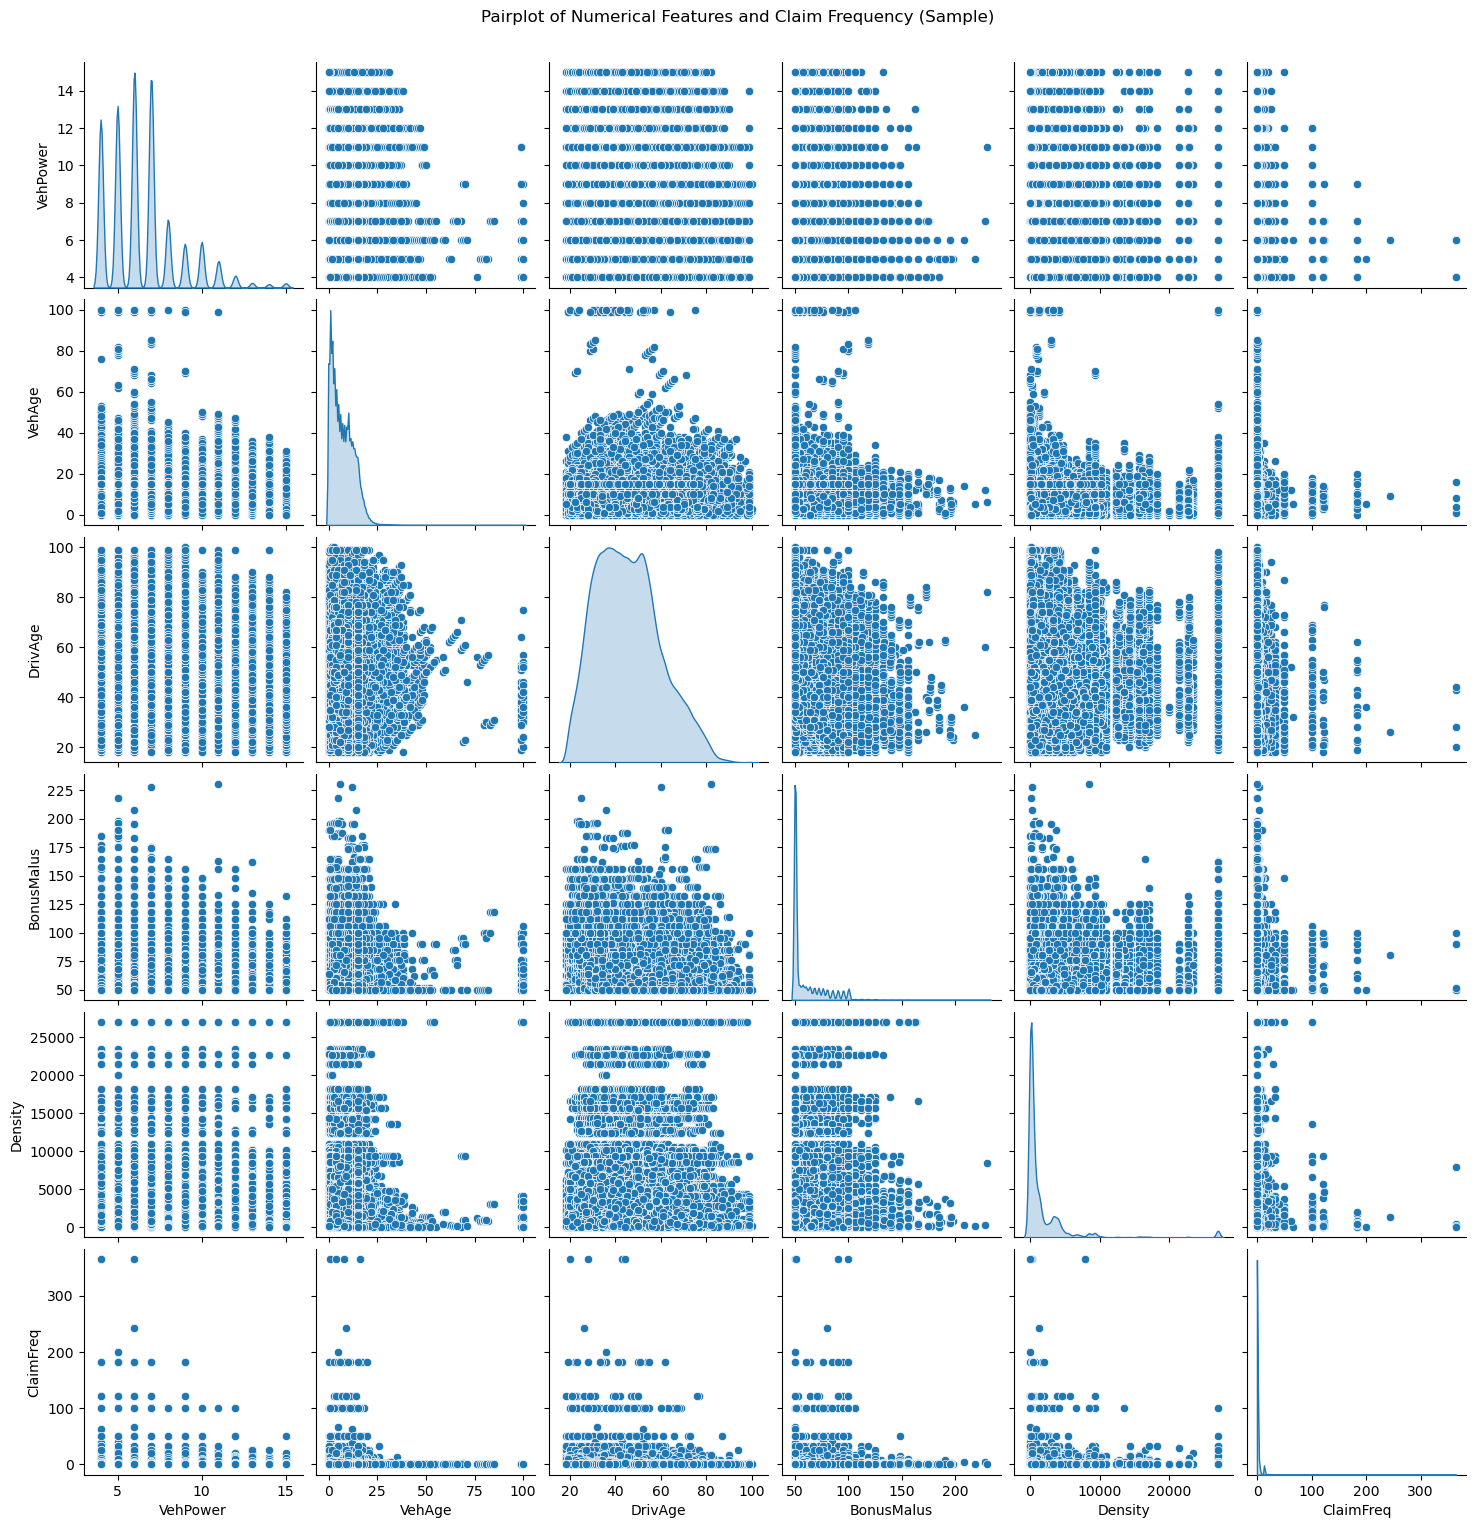

In [10]:
df_sample = df[['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density', 'ClaimFreq']]

# Create the pairplot
sns.pairplot(df_sample, diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features and Claim Frequency (Sample)", y=1.02)
plt.show()

In [11]:
# Exercise 2 (a)

# Transform features as specified
df['log_VehPower'] = np.log(df['VehPower'].replace(0, np.nan))
df['log_DrivAge'] = np.log(df['DrivAge'].replace(0, np.nan))
df['log_BonusMalus'] = np.log(df['BonusMalus'].replace(0, np.nan))
df['log_Density'] = np.log(df['Density'].replace(0, np.nan))

# Categorize VehAge
df['VehAge_cat'] = pd.cut(
    df['VehAge'], 
    bins=[-1, 5, 12, np.inf], 
    labels=['[0,6)', '[6,13)', '[13,∞)']
)

In [12]:
df

,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Exposure,ClaimNb,ClaimFreq,VehAge_cat,log_VehPower,log_DrivAge,log_BonusMalus,log_Density
0,4,9,23,100,B6,Regular,7887,R31,0.760000,0,0.0,"[6,13)",1.386294,3.135494,4.605170,8.972971
1,4,6,26,100,B6,Regular,2308,R31,0.740000,0,0.0,"[6,13)",1.386294,3.258097,4.605170,7.744137
2,4,6,26,100,B6,Regular,2308,R31,0.110000,0,0.0,"[6,13)",1.386294,3.258097,4.605170,7.744137
3,7,4,44,50,B6,Regular,37,R94,0.830000,0,0.0,"[0,6)",1.945910,3.784190,3.912023,3.610918
4,5,2,29,90,B6,Regular,335,R91,0.690000,0,0.0,"[0,6)",1.609438,3.367296,4.499810,5.814131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678002,6,10,27,118,B1,Diesel,1978,R31,0.120000,0,0.0,"[6,13)",1.791759,3.295837,4.770685,7.589842
678003,4,9,34,76,B1,Regular,6681,R11,0.060000,0,0.0,"[6,13)",1.386294,3.526361,4.330733,8.807023
678004,4,15,37,50,B1,Regular,1767,R31,0.060000,0,0.0,"[13,∞)",1.386294,3.610918,3.912023,7.477038
678005,4,15,69,50,B1,Regular,1541,R91,0.060000,0,0.0,"[13,∞)",1.386294,4.234107,3.912023,7.340187


In [13]:
# Exercise 2 (b)
# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['VehAge_cat', 'VehBrand', 'VehGas', 'Region']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat = encoder.fit_transform(df[categorical_features])

# Get new column names from encoder
encoded_col_names = encoder.get_feature_names_out(categorical_features)

# Combine numerical and encoded features into final X
X_num = df[['log_VehPower', 'log_DrivAge', 'log_BonusMalus', 'log_Density']].reset_index(drop=True)
X_cat_df = pd.DataFrame(X_cat, columns=encoded_col_names, index=X_num.index)
X = pd.concat([X_num, X_cat_df], axis=1)

In [14]:
# Define input features and target
from sklearn.model_selection import train_test_split

# Define target and weights
y = df['ClaimNb'].reset_index(drop=True)
weights = df['Exposure'].reset_index(drop=True)

# Train-Val-Test split
# 90/10 test split
X_temp, X_test, y_temp, y_test, w_temp, w_test = train_test_split(
    X, y, weights, test_size=0.1, random_state=4
)

# Then 80/20 split of remaining into train and val (→ 72% train, 18% val overall)
X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(
    X_temp, y_temp, w_temp, test_size=0.2, random_state=4
)


In [15]:
# Scale numeric features
features_to_scale = ['log_VehPower', 'log_DrivAge', 'log_BonusMalus', 'log_Density']
scaler = StandardScaler()

# Fit on train and transform all sets
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [16]:
from sklearn.linear_model import PoissonRegressor
import numpy as np
import warnings

# --- Fit Poisson GLM (original feature set) ---
glm = PoissonRegressor(alpha=0, max_iter=1000)
glm.fit(X_train, y_train, sample_weight=w_train)

# --- Predict on each set ---
λ_train = glm.predict(X_train)
λ_val = glm.predict(X_val)
λ_test = glm.predict(X_test)

# --- Save predictions and targets for later comparison ---
λ_test_original = λ_test.copy()
y_test_original = y_test.copy()
w_test_original = w_test.copy()

λ_val_original = λ_val.copy()
y_val_original = y_val.copy()
w_val_original = w_val.copy()

λ_train_original = λ_train.copy()
y_train_original = y_train.copy()
w_train_original = w_train.copy()

# --- Metric functions ---
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

def weighted_mae(y_true, y_pred, weights):
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

def weighted_mse(y_true, y_pred, weights):
    return np.sum(weights * (y_true - y_pred)**2) / np.sum(weights)

def weighted_poisson_deviance(y_true, y_pred, weights):
    eps = 1e-9  # avoid log(0)
    y_pred = np.clip(y_pred, eps, None)
    y_true = np.clip(y_true, eps, None)
    loss = 2 * (y_pred - y_true + y_true * (np.log(y_true) - np.log(y_pred)))
    return np.sum(weights * loss) / np.sum(weights)

# --- Save metrics for original model ---
mae_train_original = weighted_mae(y_train, λ_train, w_train)
mse_train_original = weighted_mse(y_train, λ_train, w_train)
loss_train_original = weighted_poisson_deviance(y_train, λ_train, w_train)

mae_val_original = weighted_mae(y_val, λ_val, w_val)
mse_val_original = weighted_mse(y_val, λ_val, w_val)
loss_val_original = weighted_poisson_deviance(y_val, λ_val, w_val)

mae_test_original = weighted_mae(y_test, λ_test, w_test)
mse_test_original = weighted_mse(y_test, λ_test, w_test)
loss_test_original = weighted_poisson_deviance(y_test, λ_test, w_test)

# --- Print for reference ---
print("Poisson GLM Results (Exercise 2b):")
print(f"Train:      MAE = {mae_train_original:.4f} | MSE = {mse_train_original:.4f} | Loss = {loss_train_original:.4f}")
print(f"Validation: MAE = {mae_val_original:.4f} | MSE = {mse_val_original:.4f} | Loss = {loss_val_original:.4f}")
print(f"Test:       MAE = {mae_test_original:.4f} | MSE = {mse_test_original:.4f} | Loss = {loss_test_original:.4f}")

Poisson GLM Results (Exercise 2b):
Train:      MAE = 0.0954 | MSE = 0.0534 | Loss = 0.2027
Validation: MAE = 0.0952 | MSE = 0.0534 | Loss = 0.2021
Test:       MAE = 0.0958 | MSE = 0.0536 | Loss = 0.2051


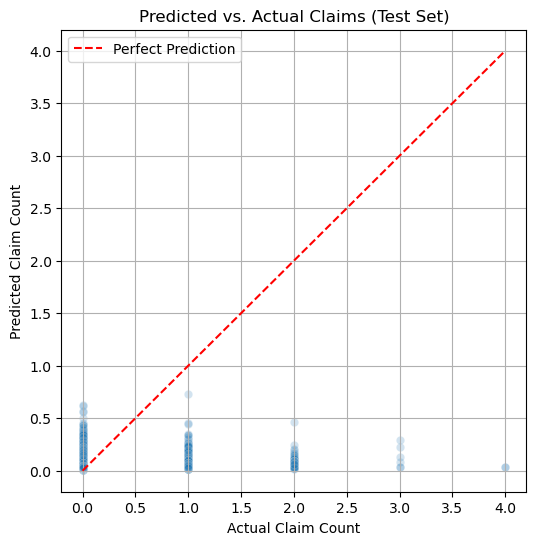

In [17]:
# Predict vs Actial Claims (with density/alpha)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=λ_test, alpha=0.2)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Claim Count')
plt.ylabel('Predicted Claim Count')
plt.title('Predicted vs. Actual Claims (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\S9YFQ5\AppData\Local\Temp\1\ipykernel_47616\1933475737.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bin_summary = df_pred.groupby('pred_bin').apply(


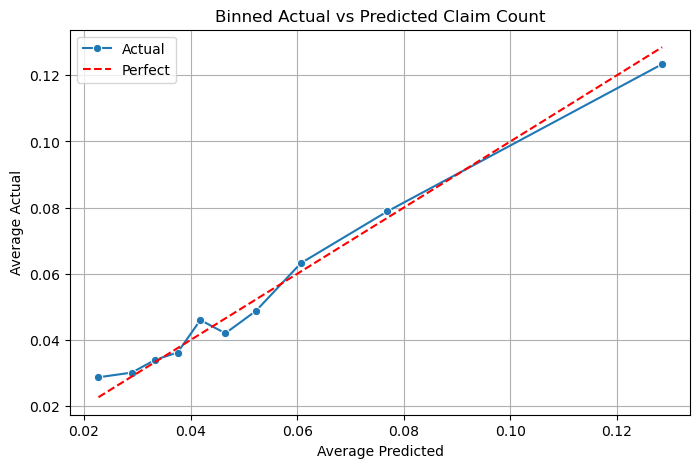

In [18]:
# Average Predicted vs Actual Claim Counts
# Combine into a DataFrame
df_pred = pd.DataFrame({
    'y_true': y_test,
    'y_pred': λ_test,
    'weight': w_test
})

# Bin predictions
df_pred['pred_bin'] = pd.qcut(df_pred['y_pred'], q=10, duplicates='drop')  # 10 quantile bins

# Compute weighted average actual and predicted values per bin
bin_summary = df_pred.groupby('pred_bin').apply(
    lambda g: pd.Series({
        'avg_actual': np.average(g['y_true'], weights=g['weight']),
        'avg_pred': np.average(g['y_pred'], weights=g['weight']),
        'count': len(g)
    })
).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=bin_summary, x='avg_pred', y='avg_actual', marker='o', label='Actual')
sns.lineplot(data=bin_summary, x='avg_pred', y='avg_pred', color='red', linestyle='--', label='Perfect')
plt.title('Binned Actual vs Predicted Claim Count')
plt.xlabel('Average Predicted')
plt.ylabel('Average Actual')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Exercise 2 (c)

# log-transformation has been performed before for 'DrivAge' and 'BonusMalus' in the df
df['DrivAge_sq'] = df['DrivAge'] ** 2
df['BonusMalus_x_DrivAge'] = df['BonusMalus'] * df['DrivAge']
df['BonusMalus_x_DrivAge_sq'] = df['BonusMalus'] * df['DrivAge_sq']

# One-hot encode categorical variables as before
X_cat = encoder.transform(df[categorical_features])
X_cat_df = pd.DataFrame(X_cat, columns=encoded_col_names, index=df.index)

# Construct full feature set including new ones
X_num = df[[
    'log_VehPower', 'log_DrivAge', 'log_BonusMalus', 'log_Density',
    'DrivAge_sq', 'BonusMalus_x_DrivAge', 'BonusMalus_x_DrivAge_sq'
]].reset_index(drop=True)

X_cat_df = X_cat_df.reset_index(drop=True)
X = pd.concat([X_num, X_cat_df], axis=1)

y = df['ClaimNb'].reset_index(drop=True)
weights = df['Exposure'].reset_index(drop=True)

In [20]:
# Train/Val/Test split with new features

X_temp, X_test, y_temp, y_test, w_temp, w_test = train_test_split(
    X, y, weights, test_size=0.1, random_state=4
)

X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(
    X_temp, y_temp, w_temp, test_size=0.2, random_state=4
)

In [21]:
# Scale original numeric features
features_to_scale = [
    'log_VehPower', 'log_DrivAge', 'log_BonusMalus', 'log_Density',
    'DrivAge_sq', 'BonusMalus_x_DrivAge', 'BonusMalus_x_DrivAge_sq'
]
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Fit Poisson GLM with new features
glm = PoissonRegressor(alpha=0, max_iter=1000)
glm.fit(X_train, y_train, sample_weight=w_train)

λ_train = glm.predict(X_train)
λ_val = glm.predict(X_val)
λ_test = glm.predict(X_test)

# Evaluation functions
def weighted_mae(y_true, y_pred, weights):
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

def weighted_mse(y_true, y_pred, weights):
    return np.sum(weights * (y_true - y_pred)**2) / np.sum(weights)

def weighted_poisson_deviance(y_true, y_pred, weights):
    eps = 1e-9
    y_pred = np.clip(y_pred, eps, None)
    y_true = np.clip(y_true, eps, None)
    loss = 2 * (y_pred - y_true + y_true * (np.log(y_true) - np.log(y_pred)))
    return np.sum(weights * loss) / np.sum(weights)

# --- Save metrics for later comparison ---
mae_test_extended = weighted_mae(y_test, λ_test, w_test)
mse_test_extended = weighted_mse(y_test, λ_test, w_test)
loss_test_extended = weighted_poisson_deviance(y_test, λ_test, w_test)

mae_val_extended = weighted_mae(y_val, λ_val, w_val)
mse_val_extended = weighted_mse(y_val, λ_val, w_val)
loss_val_extended = weighted_poisson_deviance(y_val, λ_val, w_val)

mae_train_extended = weighted_mae(y_train, λ_train, w_train)
mse_train_extended = weighted_mse(y_train, λ_train, w_train)
loss_train_extended = weighted_poisson_deviance(y_train, λ_train, w_train)

# Print metrics
print("Poisson GLM with Extended Features")
print(f"Train:      MAE = {mae_train_extended:.4f} | MSE = {mse_train_extended:.4f} | L = {loss_train_extended:.4f}")
print(f"Validation: MAE = {mae_val_extended:.4f} | MSE = {mse_val_extended:.4f} | L = {loss_val_extended:.4f}")
print(f"Test:       MAE = {mae_test_extended:.4f} | MSE = {mse_test_extended:.4f} | L = {loss_test_extended:.4f}")

Poisson GLM with Extended Features
Train:      MAE = 0.0954 | MSE = 0.0534 | L = 0.2023
Validation: MAE = 0.0953 | MSE = 0.0534 | L = 0.2017
Test:       MAE = 0.0959 | MSE = 0.0537 | L = 0.2050


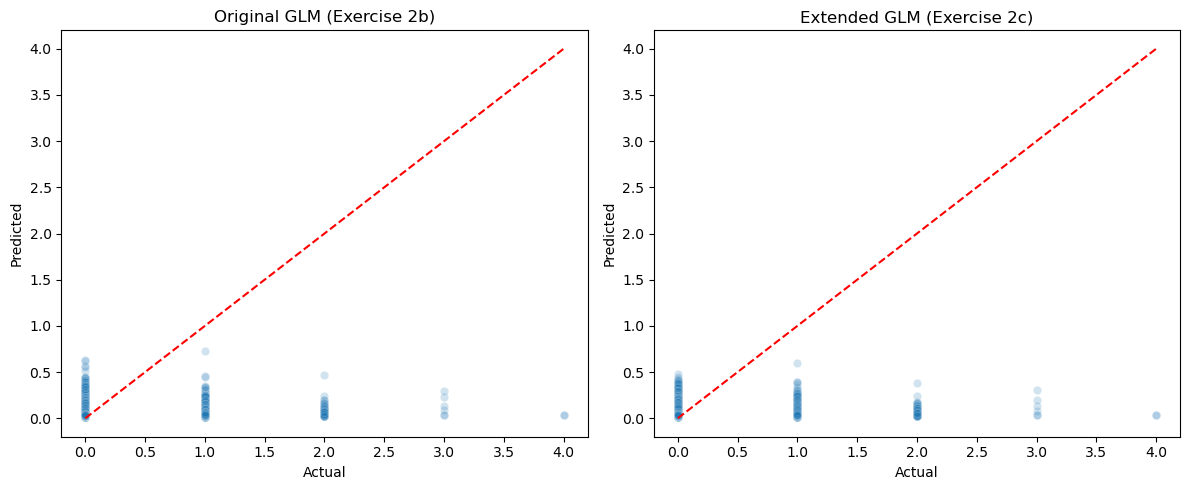

In [22]:
# Comparison: Predicted vs Actual

# New GLM predictions (from Exercise 2c)
λ_test_extended = λ_test       # Already calculated in Exercise 2c

# Actual values (same for both models)
y_true_test = y_test

plt.figure(figsize=(12, 5))

# --- Left: Original GLM ---
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_true_test, y=λ_test_original, alpha=0.2)
plt.plot([0, max(y_true_test)], [0, max(y_true_test)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Original GLM (Exercise 2b)")

# --- Right: Extended GLM ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_true_test, y=λ_test_extended, alpha=0.2)
plt.plot([0, max(y_true_test)], [0, max(y_true_test)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Extended GLM (Exercise 2c)")

plt.tight_layout()
plt.show()

C:\Users\S9YFQ5\AppData\Local\Temp\1\ipykernel_47616\226266216.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('bin').apply(lambda g: pd.Series({
C:\Users\S9YFQ5\AppData\Local\Temp\1\ipykernel_47616\226266216.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('bin').apply(lambda g: pd.Series({


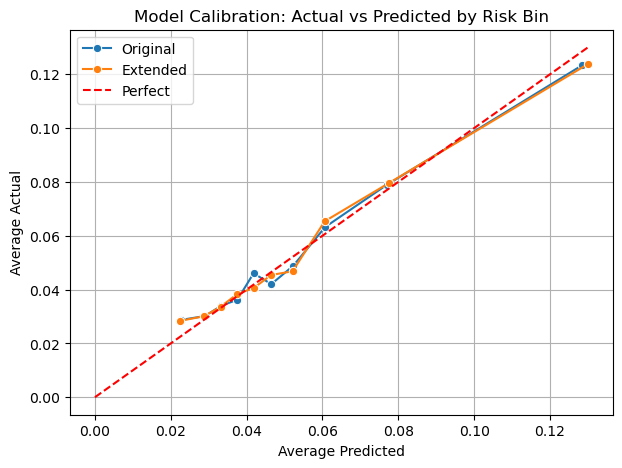

In [23]:
# Comparison: Binned Average Actual vs Predicted
def make_binned_comparison(y_true, y_pred, weights, label):
    df = pd.DataFrame({
        'y_true': y_true,
        'y_pred': y_pred,
        'weight': weights
    })
    df['bin'] = pd.qcut(df['y_pred'], q=10, duplicates='drop')
    grouped = df.groupby('bin').apply(lambda g: pd.Series({
        'avg_actual': np.average(g['y_true'], weights=g['weight']),
        'avg_pred': np.average(g['y_pred'], weights=g['weight'])
    }))
    grouped['model'] = label
    return grouped.reset_index()

# Create summaries
binned_original = make_binned_comparison(y_test, λ_test_original, w_test, label='Original')
binned_extended = make_binned_comparison(y_test, λ_test_extended, w_test, label='Extended')

# Combine and plot
binned_all = pd.concat([binned_original, binned_extended])

plt.figure(figsize=(7, 5))
sns.lineplot(data=binned_all, x='avg_pred', y='avg_actual', hue='model', marker='o')
plt.plot([0, binned_all['avg_pred'].max()], [0, binned_all['avg_pred'].max()], 'r--', label='Perfect')
plt.xlabel("Average Predicted")
plt.ylabel("Average Actual")
plt.title("Model Calibration: Actual vs Predicted by Risk Bin")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
# Comparison of model in 2 (b) and 2 (c)
comparison_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "Poisson Deviance"],
    
    "Model 2(b) – Original": [
        mae_test_original,
        mse_test_original,
        loss_test_original
    ],
    
    "Model 2(c) – Extended": [
        mae_test_extended,
        mse_test_extended,
        loss_test_extended
    ]
})

# Compute relative improvement (%)
comparison_df["Relative Improvement"] = (
    (comparison_df["Model 2(b) – Original"] - comparison_df["Model 2(c) – Extended"])
    / comparison_df["Model 2(b) – Original"]
) * 100

# Format output
print("Comparison of Poisson GLM Models on Test Set")
print(comparison_df.round(4).to_string(index=False))

Comparison of Poisson GLM Models on Test Set
          Metric  Model 2(b) – Original  Model 2(c) – Extended  Relative Improvement
             MAE                 0.0958                 0.0959               -0.0661
             MSE                 0.0536                 0.0537               -0.0457
Poisson Deviance                 0.2051                 0.2050                0.0292
